In [8]:
from IPython.display import Image

### Data
The objective of this task is to build a model to predict the chlorophyll index of several sites in `data/testing.csv`,
given 16 reflectances per-site, as well as training data in `data/training.csv` and validation data in `data/validation.csv`.

Below is a plot of wavelengths sampled from `data/training.csv`, sorted by chlorophyll:

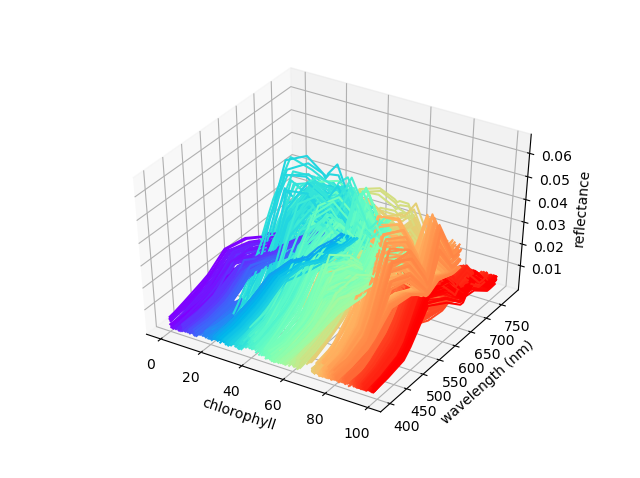

In [9]:
Image("../images/training_data.png")

This shows the pattern to which the model will fit predicted chlorophyll.
I figured that a good rough comparison metric would involve comparing the RMSE of the reference data provided in `validation.csv`
(predicted vs in-situ measurements) with the standard deviation of the measurements.

### Model Fitting
First, I ran optimizing weights with a learning rate of `1e-6`, fitting.
I chose a hidden layer size of 2/3 of the input layer size plus the output layer size, following a rule-of-thumb I [found online](https://www.heatonresearch.com/2017/06/01/hidden-layers.html).

Below is a plot of the sum of squares of loss (from predicted to reference) over time, using the original hidden layer size:

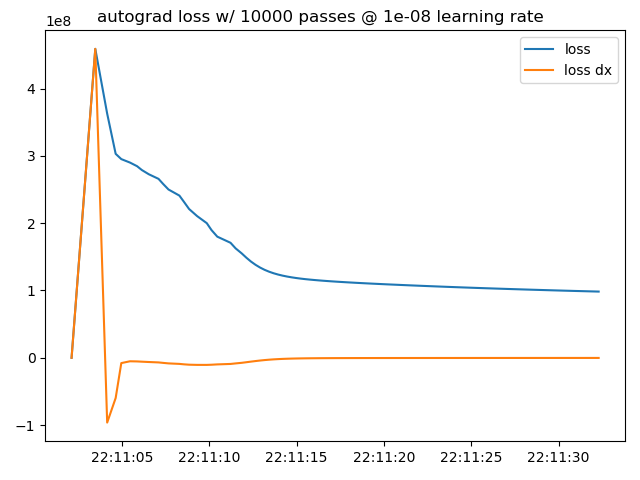

In [12]:
Image("../images/chlorophyll_autograd.png")

After optimizing weights over 10000 iterations on this run, the RMSE of predicted data vs reference data, `8.37`, was within 20% of the standard deviation of in-situ measurements, `9.38`.

Results from this model are in `outputs/1_autograd/testing.csv`